In [3]:
# %load ../jupyter_imports.py
%load_ext autoreload
%autoreload 2

from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.io import loadmat, savemat
from math import floor, ceil
# Script to add the entire project directory structure to the python path
import sys, os

# Find the root directory of the nse project
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir != 'analysis':
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
for d in ["linear", "prelim", "utils"]:
	if 'p\\%s' % d not in sys.path:
		sys.path.append('p\\%s' % d)

# Now import all the other stuff:
from utils import preprocess
from utils import process
from utils import misc 
from linear import linear_models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
x = loadmat('%s/HighGammaAllChannels10sMovingZ.mat' % misc.get_data_path())

In [6]:
x['data'].shape

(94735, 128)

In [7]:
e105 = x['data'][:, 104]

In [8]:
stim = loadmat('%s/DynRip.cchspct.6oct.100hz' % misc.get_data_path())

In [9]:
stim, resp = preprocess.align(stim['spct'], e105)

In [37]:
p = process.split_data(stim, resp, 2, delay_time=25)

---20.38519048690796 seconds---
-0.011782121093471876


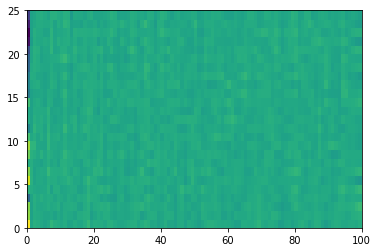

In [51]:
r = linear_models.ridge_regression(process.flatten_spct(p.train_stim), p.train_resp, process.flatten_spct(p.test_stim), p.test_resp)
plt.pcolor(np.reshape(r.coef_, (100, 25)).T)

In [80]:
p = process.split_data(stim, resp, 2, delay_time=15)

In [140]:
h, r = linear_models.boosting(process.flatten_spct(p.train_stim), p.train_resp, process.flatten_spct(p.test_stim), p.test_resp, 500)

---627.0451815128326 seconds---
0.00048073489646472295
---626.5878717899323 seconds---
0.00048073489646472295
---626.1846241950989 seconds---
0.0004807348964647222
---625.9227342605591 seconds---
0.00048073489646472295
---626.0397970676422 seconds---
0.00010222263961815443
---625.603306055069 seconds---
7.552274066191089e-06
---626.3621892929077 seconds---
1.4189388318141615e-06
---625.6072790622711 seconds---
5.837008873826932e-06
---626.3929424285889 seconds---
3.129313625383109e-05
---625.6330721378326 seconds---
5.5174014186004656e-05
---625.4614553451538 seconds---
9.728219128412506e-05
---625.74764752388 seconds---
0.00012423059155420064
---623.8529298305511 seconds---
0.00017304693901557978
---623.3311405181885 seconds---
0.00013096761587609847
---622.7780981063843 seconds---
0.00015509142819949748
---622.7160997390747 seconds---
0.00017031058495371506
---626.8219816684723 seconds---
0.0001927231332912994
---626.0442543029785 seconds---
0.00015062329598000912
---623.470515012741

KeyboardInterrupt: 

In [85]:
y = np.zeros(10)

In [124]:
h

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
x[3] = 1

In [88]:
x

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [89]:
y

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [96]:
100 * 15* 0.14 * 100/3600

5.833333333333334

In [106]:
y = np.array([[1, 3], [4, 2], [5, 0]])

In [107]:
y

array([[1, 3],
       [4, 2],
       [5, 0]])

In [114]:
min1 = np.argmin(y, axis = 0)

In [109]:
min2 = np.argmin(np.amin(y, axis = 0))

In [113]:
min1[min2]

2

In [111]:
min2

1

In [112]:
np.amin(y, axis = 0)

array([1, 0])

In [115]:
min1

array([0, 2], dtype=int64)

In [128]:
y

array([[1, 3],
       [4, 2],
       [5, 0]])

In [129]:
y = np.arange(100)

In [130]:
np.random.choice(y, 10)

array([84, 41, 41, 95, 90, 19, 42, 79,  2, 66])

In [131]:
np.random.choice(y, 10)

array([83, 43, 96, 65, 50, 88, 38,  5, 45, 23])

In [132]:
np.random.choice(y, 10)

array([ 7, 77, 35, 97,  7, 29, 60, 94, 79, 49])

In [135]:
y[5] += 1

In [136]:
y

array([ 0,  1,  2,  3,  4,  6,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])